# Machine Learning Exercises 3

# Q1. Implement Support Vector Machines (SVMs) from scratch (35 Points)

## 1. Generate and visualize data: 
Run the following code to generate non-linearly separable data. 

In [4]:
import numpy as np
import random
def gen_data():
    np.random.seed(105)
    Positive = np.concatenate((np.random.randn(10, 2) * 0.4 + [1.5, -0.5],
                             np.random.randn(10, 2) * 0.4 + [-1.5, 0.5]))
    Negative = np.random.randn(20, 2) * 0.3 + [0.0, -0.9]

    return Positive, Negative

## 2. Plot data
Perform data visualization on the above generated data. 


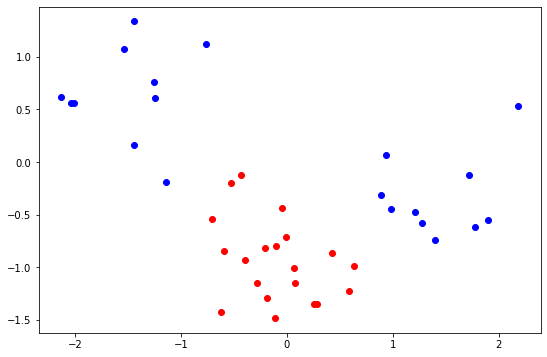

In [5]:
import matplotlib.pyplot as plt

def plot_data(Positive, Negative):
  plt.figure(figsize = (9, 6))
  plt.scatter(Positive[:, 0], Positive[:, 1], c = 'b')
  plt.scatter(Negative[:, 0], Negative[:, 1], c = 'r')
  plt.show()

pos, neg = gen_data()
plot_data(pos, neg)

Expected output for visualization

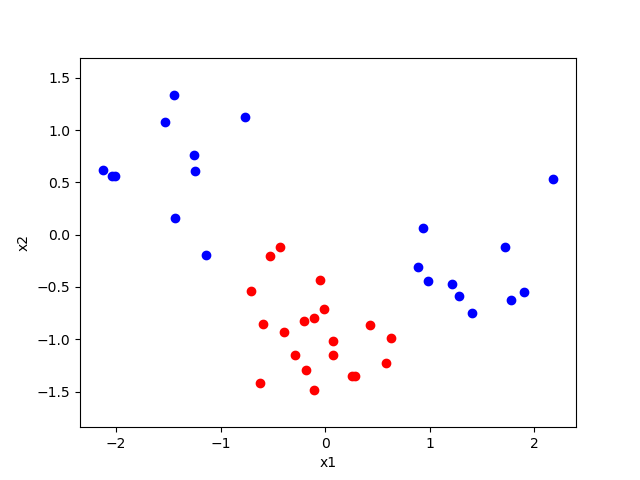

## 3. Fit SVM with linear kernel with slack variable (10+5 Points)
  - Implement **SVM with linear kernel**. Explain why training the linear kernel model without C would fail?  **(10 Points)**
Hint : You can use [minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) of scipy.optimize for optimization of the dual function.  
  $max_\lambda q(λ) = \sum_i \lambda_i - \frac{1}{2}\sum_{ij} y_i y_j \lambda_i \lambda_jk(x_i, x_j)$

  You may need to modify the formulation to convert objective from maximization to minimization.
  $min_\lambda q(λ) = \frac{1}{2}\sum_{ij} y_i y_j \lambda_i \lambda_jk(x_i, x_j) - \sum_i \lambda_i$

  The minimize() function returns a dictionary that contains the optimal values of $\lambda$s stored in 'x' key. 
  - **Optimize slack variable**:  Fit linear kernel using C in [0,1,2,3,4,5]. Explain the effect of different choices of C.  **(5 Points)**


Training the model with C would fail because we need a slack variable for data that is not linearly separable. Without the slack variable the parameter adjustments will never stop. 

C, being the slack variable, determines how much allowance there is in the model for points being on the wrong side of the decision boundary. The higher the value of C, the more latitude on the decision boundary.

In [6]:
def linear_kernel(x, y, **kwargs):
    # insert your code here 
    kernel = np.dot(x,y)
    return kernel

def fun(alphas, X, Y, C, kernel):
    value1 = sum(alphas)
    value2 = 0
    for i in range(len(X)):
      for j in range(len(X)):
        if kernel == 'linear kernel':
          value2 += (Y[i]*Y[j]*alphas[i]*alphas[j]*linear_kernel(X[i],X[j]))
        elif kernel == 'polynomial kernel':
          value2 += (Y[i]*Y[j]*alphas[i]*alphas[j]*polynomial_kernel(X[i],X[j]))
        else:
          print("Kernel type not selected.")

    return 0.5*value2 - value1

def constraint(alphas, X, Y, C, kernel):
    return np.dot(alphas, Y)

    

In [7]:
from scipy.optimize import minimize
def fit(X, Y, C=None, kernel=None, **kwargs):
    '''
    X: input_data (Nx2) numpy array
    Y: binary target variable (N,) numpy array
    C: The slack variable
    kernel: kernel function (linear or polynomial)
    kwargs: dictionary of arguments
    '''

    start = np.ones((len(X), 1))*0.5
    if C is not None:
      arguments = (X, Y, C, kernel)
    else:
      arguments = (X, Y, 1, kernel) #default to 1 if unspecified
    
    bnds = [(0, C)]*len(Y)
    # insert your code here
    # Apply optimization of dual function (Equation 7.10: Bishop)
    cons = ({'type' : 'eq', 'fun' : constraint, 'args' : arguments})
    opt = minimize(fun, start,  bounds = bnds, constraints = cons, args = arguments)
    # make use of minimize()

    return opt.x

## 4. Linear Kernel decision boundary visualization (10 Points)
Visualize datapoints and SVM decision boundary and margins with C=5. Color misclassified points appropriately. 
- Implement get_support_vectors() method that return support vectors based on 
- This would require you to implement a predict() method. (Slide 3 or Equation 7.13 : Bishop)




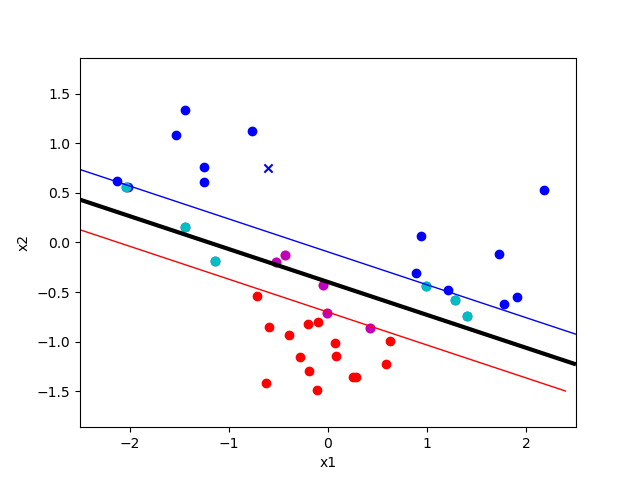

In [8]:
def get_support_vectors(X, Y, lambdas, threshold=10e-5):
  # insert your code here
  # return support vectors, target variable values of the support vectors, lambdas of support vectoss
  # remeber only lambdas >=0 are to be kept
  s_vecs = []
  s_vec_labels = []
  s_vec_lambdas = []
  for i in range(len(lambdas)):
    if lambdas[i] > threshold:
      s_vecs.append(X[i])
      s_vec_labels.append(Y[i])
      s_vec_lambdas.append(lambdas[i])

  return np.array(s_vecs), np.array(s_vec_labels), np.array(s_vec_lambdas)

In [9]:
def predict(test_point, s_vecs, s_vecs_Y, s_vecs_lambda, kernel, more = False, **kwargs):
  '''
  test_point: test datapoint
  s_vecs: Support vectors 
  s_vecs_Y: target values of the Support vectors
  s_vec_lambda: Dual variables corresponding to the support vectors
  kernel, kwargs: kernel function (linear or polynomial)
  '''
  # insert your code here
  # Apply support vectors to predict the class of test_point (Equation 7.13: Bishop)
  prediction = 0
  for i in range(len(s_vecs)):
    if kernel == 'linear kernel':
      prediction += s_vecs_Y[i]*s_vecs_lambda[i]*linear_kernel(test_point, s_vecs[i])
    elif kernel == 'polynomial kernel':
      prediction += s_vecs_Y[i]*s_vecs_lambda[i]*polynomial_kernel(test_point, s_vecs[i])
    else:
      print("Kernel not specified")
  if more:
    return prediction
  if prediction >= 1:
    return 1
  else:
    return -1
  return prediction

In [10]:
from pandas.compat.numpy.function import MINMAX_DEFAULTS
def plot_decision_boundary(Positive, Negative,
                           ip_new,
                           s_vecs, s_vecs_Y, s_vec_lambda,
                           kernel, **kwargs):
  '''
  Positive, Negative: Example datapoints from both classes
  test_point: test data point (2, )
  s_vecs: Support vectors
  s_vecs_Y: Target variable values for the support vectors
  s_vec_lambda: Dual variables corresponding to the support vectors
  kernel, kwargs: kernel function (linear or polynomial)
  '''
  # make use of plt.contour() and plt.scatter()
  plt.figure(figsize = (12, 9))

  weights = 0
  for i in range(len(s_vecs)):
    weights += s_vecs[i]*s_vecs_Y[i]*s_vec_lambda[i]

  minVal = 100000
  maxVal = -100000
  minInd = -1
  maxInd = -1
  for i in range(len(Positive)):
    if np.dot(weights, Negative[i]) > maxVal:
      maxVal = np.dot(weights, Negative[i]);
      maxInd = i
    if np.dot(weights, Positive[i]) < minVal:
      minVal = np.dot(weights, Positive[i]);
      minInd = i

  b = -0.5*(maxVal + minVal)

  if kernel == 'linear kernel':
    xx = np.linspace(min(Positive[:,0]), max(Positive[:,0]))
    yy = -1*(weights[0]/weights[1])*xx - b/np.linalg.norm(weights)
    up = yy + 1/np.linalg.norm(weights)
    down = yy - 1/np.linalg.norm(weights)
    plt.plot(xx, yy, c = 'k')
    plt.plot(xx, up,'k--')
    plt.plot(xx, down,'k--')
    for i in range(len(Positive)):
      if (Positive[i,0],Positive[i,1]) in s_vecs:
        plt.scatter(Positive[i,0],Positive[i,1], c = 'c')
      else:
        plt.scatter(Positive[i,0],Positive[i,1], c = 'b')
      if (Negative[i,0],Negative[i,1]) in s_vecs:
        plt.scatter(Negative[i,0],Negative[i,1], c = 'm')
      else:
        plt.scatter(Negative[i,0],Negative[i,1], c = 'r')
    if predict(ip_new, s_vecs, s_vecs_Y, s_vec_lambda, kernel) > 0:
      new_col = 'b'
    else:
      new_col = 'r'
    plt.scatter(ip_new[0], ip_new[1], c = new_col, marker = 'x')



  if kernel == 'polynomial kernel':
    XX, YY = np.meshgrid(np.arange(-2,2,0.02), np.arange(-2,2,0.02))
    Z = np.zeros((len(XX),len(YY)))
    for i in range(len(Z[:,0])):
      for j in range(len(Z[0,:])):
        point = (float(XX[i,j]), float(YY[i,j]))
        #print(point)
        prediction = 0
        prediction = predict(point, s_vecs, s_vecs_Y, s_vec_lambda, kernel, more = True)
        if prediction >= 1:
          Z[i,j] = 1
        elif prediction <= -1:
          Z[i,j] = -1
        elif 0 < prediction and prediction < 1:
          Z[i,j] = 0.5
        elif 0 > prediction and prediction > -1:
          Z[i,j] = -0.5
        else:
          Z[i,j] = 0
        #if prediction > 0:
        #  plt.scatter(point[0], point[1], c ='g')
        #else:
        #  plt.scatter(point[0], point[1], c='y')
    plt.contour(XX,YY,Z,2)
    for i in range(len(Positive)):
      if (Positive[i,0],Positive[i,1]) in s_vecs:
        plt.scatter(Positive[i,0],Positive[i,1], c = 'c')
      else:
        plt.scatter(Positive[i,0],Positive[i,1], c = 'b')
      if (Negative[i,0],Negative[i,1]) in s_vecs:
        plt.scatter(Negative[i,0],Negative[i,1], c = 'm')
      else:
        plt.scatter(Negative[i,0],Negative[i,1], c = 'r')
    if predict(ip_new, s_vecs, s_vecs_Y, s_vec_lambda, kernel) > 0:
      new_col = 'b'
    else:
      new_col = 'r'

    
    plt.scatter(ip_new[0], ip_new[1], c = new_col, marker = 'x')


  plt.show()
  # plot decision boundary along with margins


The following function will be used to test your solution.

11 support vectors found.\n [[ 0.98524228 -0.44313042]
 [-0.43042553 -0.1224234 ]
 [-1.14212888 -0.19215842]
 [-0.52528106 -0.19958112]
 [ 0.42448628 -0.86445712]
 [ 1.2778755  -0.58188648]
 [-2.03524537  0.56015045]
 [-1.44075191  0.15927811]
 [-0.04612834 -0.43374017]
 [-0.00892175 -0.71463001]
 [ 1.40186973 -0.74534088]]


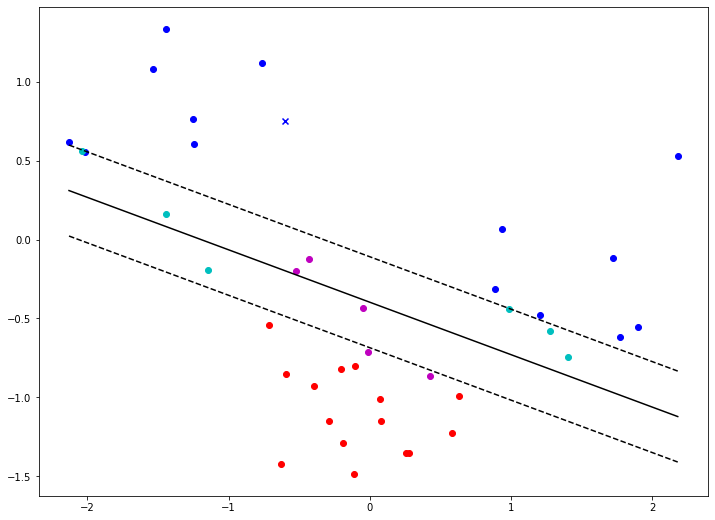

In [11]:
# Test code
if __name__ == '__main__':
    Positive, Negative = gen_data()
    #plot_data(Positive, Negative)
    X = np.concatenate((Positive, Negative))
    target_data = np.concatenate((np.ones(Positive.shape[0]), -np.ones(Negative.shape[0])))
    Y = target_data
    size = X.shape[0]
    shuffle_data = list(range(size))
    random.shuffle(shuffle_data)
    X = X[shuffle_data, :]
    Y = Y[shuffle_data]

    lambdas = fit(X, Y, C=5, kernel='linear kernel', kwargs={})

    # Get the alpha values for the support vectors, as well as their target data.
    s_vecs, s_vecs_Y, s_vecs_lambda = get_support_vectors(X, Y, lambdas)
    print(f"{s_vecs.shape[0]} support vectors found.\\n", s_vecs)

    # test new data point
    ip_new = np.array([-0.6, 0.75])
    prediction = predict(ip_new,
                         s_vecs,
                         s_vecs_Y,
                         s_vecs_lambda,
                         kernel= 'linear kernel',
                         kwargs={})

    plot_decision_boundary(  Positive, Negative,
                             ip_new,
                             s_vecs,
                             s_vecs_Y,
                             s_vecs_lambda,
                             kernel= 'linear kernel',
                             kwargs={})


## 5. SVM with polynomial kernel.  (10 Points)
Implement polynomial kernel function. Fit the same data with polynomial of degree 2.


In [12]:
def polynomial_kernel(x, y, **kwargs):
  # insert your code here
  # return polynomial kernel output
  kernel = 0
  kernel = np.dot(x, y)+1
  return kernel**2


The following functions are to be used to test your implementation.

5 support vectors found.\n [[ 0.88640301 -0.31171598]
 [-1.14212888 -0.19215842]
 [-0.76590095  1.12063704]
 [-0.52528106 -0.19958112]
 [ 0.62905985 -0.99111128]]
1.2888066572629326


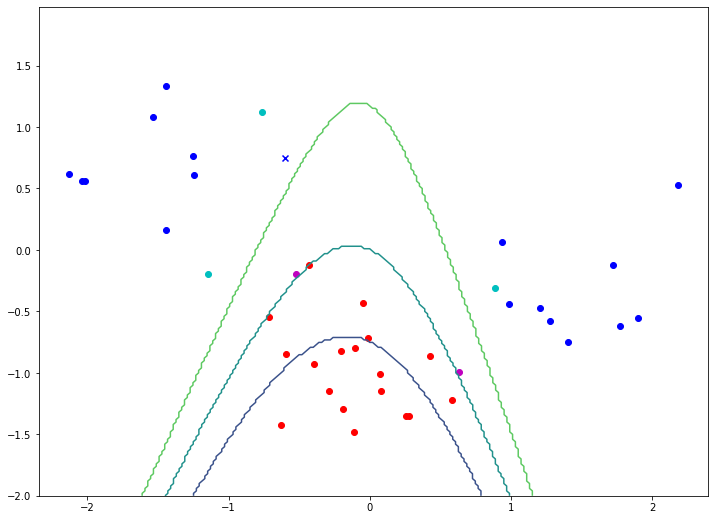

In [13]:
def test_polynomial_kernel(X, Y):
    kernel = 'polynomial kernel'
    kwargs = {'p': 2}
    lambdas = fit(X,
                  Y,
                  C=None,  # slack variable
                  kernel=kernel,
                  **kwargs)
    # Get the alpha values for the support vectors, as well as their target data.
    s_vecs, s_vecs_Y, s_vecs_alpha = get_support_vectors(X,
                                                         Y,
                                                         lambdas)
    print(f"{s_vecs.shape[0]} support vectors found.\\n", s_vecs)
    ip_new = np.array([-0.6, 0.75])
    prediction = predict(ip_new,
                         s_vecs,
                         s_vecs_Y,
                         s_vecs_alpha,
                         kernel=kernel,
                         more = True,
                         **kwargs)
    print(prediction)
    plot_decision_boundary(Positive, Negative,
                           ip_new,
                           s_vecs,
                           s_vecs_Y,
                           s_vecs_alpha,
                           kernel=kernel,
                           **kwargs)
if __name__ == '__main__':
    Positive, Negative = gen_data()
    # plot_data(Positive, Negative)
    X = np.concatenate((Positive, Negative))
    Y = np.concatenate((np.ones(Positive.shape[0]), -np.ones(Negative.shape[0])))
    size = X.shape[0]
    shuffle_data = list(range(size))
    random.shuffle(shuffle_data)
    X = X[shuffle_data, :]
    Y = Y[shuffle_data]

    # test_linear(X, Y)
    test_polynomial_kernel(X, Y)

Expected output.

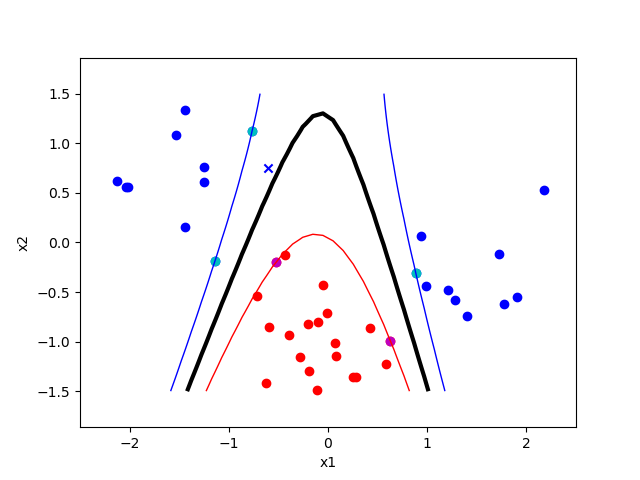

# Q2. Neural Networks (25 Points)

1. Forward Propagation : Find the value of L (7 points)
2. Backward Propagation: Find all the derivatives(of all xi,x2,y1,y2,z2,z2,z) wrt to each inputs and weights (18 points)

Consider the weights as shown below

Assuming the arrows into X1 and X2 are the input:


*   X1 = -1
*   X2 = 1
*   Y1 = -1*-2 + 1 *1 = 3
*   Y2 = -1*1 + 1 *2 = 1
*   Z1 = 1*3 + -2 *1 = 1
*   Z2 = -1*3 + 0 *1 = -3
*   Z = 1*1 + -3 *-1 = 4
*   L = (4-3)^2 = 1



*   E = 1
*   dE/dL = 2(Z-3) = 2
*   dE/dZ = 2
*   dZ/dwz1 = 1
*   dZ/dwz2 = -3
*   dZ/dZ1 = 1
*   dZ/dZ2 = -1
*   dZ1/dwy1 = 3
*   dZ1/dwy3 = 1
*   dZ2/dwy2 = 3
*   dZ2/dwy4 = 1
*   dZ1/dY1 = 1
*   dZ1/dY2 = -2
*   dZ2/dY1 = -1
*   dZ2/dY2 = 0
*   dY1/dwx1 = -1
*   dY1/dwx3 = 1
*   dY2/dwx2 = -1
*   dY2/dwx4 = 1
*   dY1/dX1 = -2
*   dY1/dX2 = 1
*   dY2/dX1 = 1
*   dY2/dX2 = 2
*   dX1/dI1 = 1
*   dx2/dI2 = 1


---


*   dE/dZ1 = dE/Z * dZ/dZ1 = 2
*   dE/dZ2 = dE/dZ * dZ/dZ2 = -2
*   dE/dY1 = dE/dZ1 * dZ1/dY1 + dE/dZ2 * dZ2/dY1 = 2 + 2 = 4
*   dE/dY2 = dE/dZ1 * dZ1/dY2 + dE/dZ2 * dZ2/dY2 = -4 + 0 = -4
*   dE/dX1 = dE/dY1 * dY1/dX1 + dE/dY2 * dY2/dX1 = -8 + -4 = -12
*   dE/dX2 = dE/dY1 * dY1/dX2 + dE/dY2 * dY2/dX2 = 4 + -8 = -4

Any dE/dweight can be calculated from the above list.



# Q3.Understanding Random Forest Classifier (40 Points)

1. Build a Random Forest classifier for the [handwritten digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits/) and find its performance (classification report, confusion matrix) (3 Points)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.datasets import load_digits
digits, labels = load_digits(return_X_y = True)

2. Investigate following parameters of Random Forest classifier and tune them using Randomized Search and Grid Search. (15 points)
- Number of nodes per tree
- Number of trees
- Depth of trees
- Minimum Samples to split
- Minumum Samples in leaf

Use seed 1 and split the data into 80/20 train/val sets. Traing a classifier with each unique configuration and record train/val accuracy, precision and recall in the results dataframe. This dataframe will have 5 columns (each corresponding to tuning parameter) and each row will correspond to each unique configuration. 5x5x5x5x5 rows. 

Visualize the results dataframe using [parallel coordinates](https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html). You will create a column in results dataframe that contains label of each row. Create labels according to accuracy score 50-60 (D), 60-70 (C), 70-80 (B), 80-90 (A), 90+ (A+). These labels will be required for parallel coordinates plot.

Analyze of the impace of each tuning parameter on predictor performance.


In [25]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
# The paramater values are only suggestive. You can come up with better choices.

train_X, test_X, train_Y, test_Y = train_test_split(digits, labels, test_size = 0.2, random_state = 1)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,4)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]



clf = RandomForestClassifier()
params = {'n_estimators' : n_estimators,
          'max_depth' : max_depth,
          'max_features' : max_features,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf}
n_iters = 100
random_search = RandomizedSearchCV(clf, param_distributions = params,
                                   n_iter = n_iters)
random_search.fit(train_X, train_Y)

def accuracy(guessY,testY):
  count = 0
  correct = 0
  for i in range(len(test_Y)):
    count+=1
    if guessY[i] == testY[i]:
      correct += 1
  return correct/count

results = pd.DataFrame(columns = ['Estimators', 'Max Depth', 'Max Features', 'Min Sample Splits', 'Min Sample Leaf', 'Accuracy', 'Category'])

for estimate in n_estimators:
  for feature in max_features:
    for depth in max_depth:
      for split in min_samples_split:
        for leaf in min_samples_leaf:
          rfc = RandomForestClassifier(n_estimators = estimate,
                                       max_depth = depth,
                                       min_samples_split = split,
                                       min_samples_leaf = leaf,
                                       max_features = feature)
          rfc.fit(train_X, train_Y)
          guess_Y = rfc.predict(test_X)
          acc = accuracy(guess_Y, test_Y)
          grade = 'F'
          if acc > 0.6:
            grade = 'D'
          if acc > 0.7:
            grade = 'C'
          if acc > 0.8:
            grade = 'B'
          if acc > 0.9:
            grade = 'A'
          if acc > 0.95:
            grade = 'A+'

          if feature == 'auto':
            cat = 1
          if feature == 'sqrt':
            cat = 2
          if feature == 'log2':
            cat = 3
          
          results = results.append({'Estimators' : estimate, 'Max Depth' : depth,
                          'Max Features' : cat, 'Min Sample Splits' : split,
                          'Min Sample Leaf' : leaf, 'Accuracy' : acc,
                          'Category' : grade}, ignore_index = True)


    Estimators Max Depth Max Features Min Sample Splits Min Sample Leaf  \
368        400      1000            3                 2               1   
4          100        10            1                 5               1   
32         100       670            1                 2               1   
80         100       340            2                 2               1   
116        100      1000            2                 5               1   
160        100       670            3                 2               1   
208        400       340            1                 2               1   
241        400      1000            1                 2               2   
272        400       340            2                 2               1   
320        400        10            3                 2               1   

     Accuracy Category  
368  0.988889       A+  
4    0.986111       A+  
32   0.986111       A+  
80   0.986111       A+  
116  0.986111       A+  
160  0.986111       A+  

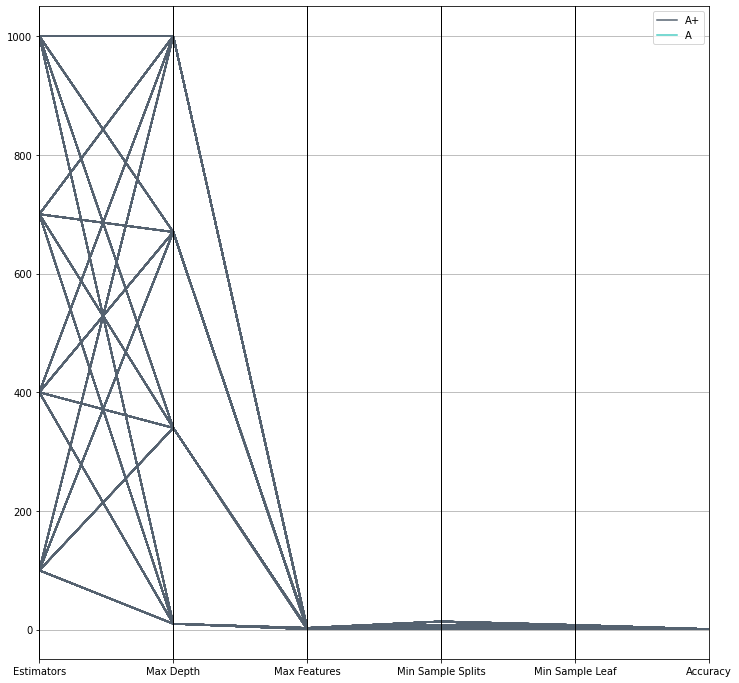

In [30]:
import pandas as pd
#print(results)
plt.figure(figsize = (12,12))
pd.plotting.parallel_coordinates(results, 'Category', color = ('#556270', '#4ECDC4', '#C7F464'))
best = results.nlargest(10, ['Accuracy'])
print(best)
#analyze results
#out = random_search.cv_results_
#df = pd.DataFrame(out)
#best = df.loc[df['rank_test_score'] < 11]
#best = best[['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]
#best = best.sort_values(by = ['rank_test_score'])
#best = best.reset_index(drop=True)
#plt.figure(figsize = (12,12))
#pd.plotting.parallel_coordinates(best, 'rank_test_score')

#best_guess = (random_search.predict(test_X))
#best_Y = test_Y

3. From the results of the above find the best estimators and use them for classifcation once again and evaluate the performance using 10 fold cross validation. (10 Points)

In [35]:
# Number of trees in random forest
n_estimators = [100, 400]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [10, 340, 670, 1000]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

clf = RandomForestClassifier()
params = {'n_estimators' : n_estimators,
          'max_depth' : max_depth,
          'max_features' : max_features,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf}
n_iters = 100
random_search = RandomizedSearchCV(clf, param_distributions = params,
                                   n_iter = n_iters, cv = 10)
grid_search = GridSearchCV(clf, param_grid = params, cv = 10)
grid_search.fit(train_X, train_Y)
random_search.fit(train_X, train_Y)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [10, 340, 670, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 400]})

In [37]:
rsacc = accuracy(random_search.predict(test_X), test_Y)
gsacc = accuracy(grid_search.predict(test_X),test_Y)
print(rsacc)
print(random_search.best_estimator_)
print(gsacc)
print(grid_search.best_estimator_)

0.975
RandomForestClassifier(max_depth=340, max_features='log2')
0.9805555555555555
RandomForestClassifier(max_depth=340)


4. Describe what is the difference between Randomized Search and Grid Search (4 points)


Randomized search progresses... randomly... through the available parameters and tries to guess which parameters are working better.
Grid search just looks through each combination and compares them. This makes grid search take longer despite achieving virtually the same results randomized search does.

5. Why do we have to perfrom cross validation (3 points)


Because we are not simply concerned with how well the classifier can fit the training data as a whole, but also how it will perform on test/real data. 

Cross validation helps by testing the classifier on smaller segments of the training data so we can get a better idea of how well it will perform on data that it is not possibly over-fitted to.


6. Explain how each of the parameters of Random Forest considered effect the performance (5 points)

In this particular implementation, the classifier achieved excellent results mostly regardless of the specific parameterization.

From the best results we can determine that max_feature parameter was not particularly important. 

All the best instances had a min_sample_leaf parameter of 1, suggesting that was the best value.

The min_sample_splits were on the lower side, suggesting that splitting more lead to slightly better results.

Max_depth is represented by a fairly even spread, so this too does not seem to have been as important. 

n_Estimators was mostly on the lower end as well, with preference for the 100 and 400 values, so this parameter also seemed to have a greater impact on the results.  